In [2]:
import suite2p
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os
import glob
##python -m pip install -U scikit-image
from skimage import measure
from natsort import natsorted
from multiprocessing import Pool
import importlib
import scipy.ndimage as ndimage
import sys
# Add the directory containing your script to the Python path
#sys.path.append('C:\\Users\\User\\Project-SLMonlineControl\PYsubfun')
sys.path.append('C:\\Users\\zhangl33\Projects\\Project-SLMonlineControl\PYsubfun')
# Now you can import your script as a module
import CalBin2p as CB
# Now you can import your script as a module
import FastBin_Suite2p as FBS

import gc
gc.collect()

0

In [3]:
importlib.reload(FBS)
# Pre-set parameters, and load the only bin files in the pre-set path folde
ConfigFolder=r'C:\Users\zhangl33\Projects\Project-SLMonlineControl\config'
ops0=FBS.configLoad(ConfigFolder,'SLMsetting.yml','ops3Planes.npy')
ops0['save_path0']=r'F:\LuSLMOnlineTest\03262024Test\\'
nplanes=ops0['nplanes'];
binFile = glob.glob(ops0['save_path0'] + '/*Point*.bin')
#print(binFile)
#del statSingleP


In [4]:
binFolder=ops0['save_path0']
#print(binFolder)
## creat new folder to process the data
SaveFolder=os.path.join(ops0['save_path0'], 'suite2p');
#print(SaveFolder)
SLMxmlFolder=os.path.join(ops0['save_path0']+'SingleP', 'AllPoint');
SLMxmlFolder=os.path.join(ops0['save_path0'], 'SingleP');
#print(SLMxmlFolder)
CombinePath=os.path.join(SaveFolder, 'combined');
#print(CombinePath)
loaded_data=np.load(os.path.join(CombinePath, "statUpdate.npz"),allow_pickle=True)
stat=loaded_data['stat']
UnitPlane=loaded_data['UnitPlane']

loaded_data=np.load(os.path.join(CombinePath, "ops.npy"),allow_pickle=True)
#stat=np.load(os.path.join(CombinePath, "stat.npy"),allow_pickle=True)
iscell=np.load(os.path.join(CombinePath, "iscell.npy"))


In [5]:
UnitPlane=np.array(UnitPlane)
#print(UnitPlane==0 && iscell[:,0]==1)
#statSingleP=stat[(UnitPlane==0)&(iscell[:,0]==1)]

stat=stat[iscell[:,0]==1]
UnitPlane=UnitPlane[iscell[:,0]==1]
iscell=iscell[iscell[:,0]==1,:]

temp_mat_data = scipy.io.loadmat(os.path.join(SLMxmlFolder,"SLMIncludedIndFromIscell.mat"))


SinglePInd=temp_mat_data['SLMIncludedIndFromIscell'].flatten()-1      ##Original Index is defined in MATLAB, should -1 for Python Index
#print(SinglePInd)

statSingleP=stat[SinglePInd]
PlaneSingleP=UnitPlane[SinglePInd]
SinglePID=SinglePInd+1
#print(SinglePID)

In [6]:
cellIDMap, CellPixCount, MedCenter=CB.Suite2pCellIDMap(ops0,stat,iscell)
#plt.imshow(cellIDMap)
#print(MedCenter)
#ZPlane = [0,60,120]
CellXYZ=np.vstack((MedCenter.T,UnitPlane))
#print(CellXYZ)
CellXYZ=CellXYZ.T
#print(CellXYZ)
CellXYZ=CellXYZ[:,[1,0,2]]
ZPlane=np.array([0,50,100])
##CellXYZ: 3D Coordinates of Cell Center
for iZ,Zdepth in enumerate(ZPlane):CellXYZ[UnitPlane==iZ, 2] = Zdepth

print(CellXYZ.shape)
#CellXYZ[SinglePInd[CellID],range(2)]

(28, 3)


In [7]:
print(PlaneSingleP)
print(len(statSingleP))
print(SinglePID)
#print(Point)

[0 0 0 0 1 1 2 2]
8
[ 2  3  5  9 14 17 25 27]


In [8]:
len(PlaneSingleP)
colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
ResponseAll=[None]*len(PlaneSingleP)
print(np.ceil(len(statSingleP)/4))
np.int16(np.ceil(len(statSingleP)/4))

2.0


2

In [10]:
importlib.reload(CB)
matching_files = []
matching_files.extend(glob.glob(os.path.join(ops0['save_path0'], '*Point*.bin' )))
#print(matching_files)
SingL=36

FilesOut=CB.PointLaser_files(matching_files)
#print(FilesOut)
PointBinLevel=np.int16(list(FilesOut.keys()))
#print(PointBinLevel)
#FilesOut[m[2]].keys()
# Loop through the outer dictionary by Point numbers
FAll=dict()
DeltaFAll=dict()
SpksAll=dict()
# Loop through the outer dictionary by Point numbers
for point_number, lasers in FilesOut.items():
    #print(f"Point {point_number}:")
    CellI=np.int16(point_number)-1
    #print(CellI)
    FAll[point_number]=dict()
    DeltaFAll[point_number]=dict()
    SpksAll[point_number]=dict()
    # Loop through the nested dictionary by Laser levels for each Point
    for laser_level, files in lasers.items():
        #print(laser_level)
        print(f" Point {point_number} Laser {laser_level}:")
        plane_idx=PlaneSingleP[CellI]
        FAll[point_number][laser_level],DeltaFAll[point_number][laser_level],SpksAll[point_number][laser_level]=CB.NeuroFromBin(files,statSingleP,plane_idx,SingL,ops0)


 Point 7 Laser 1.12:
Masks created, 0.19 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.03 sec.
Masks created, 0.24 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.03 sec.
Masks created, 0.23 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Masks created, 0.22 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.03 sec.
Masks created, 0.21 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Masks created, 0.22 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
 Point 7 Laser 1.16:
Masks created, 0.23 sec.
Extracted fluorescence from 8 ROIs in 36 frames, 0.02 sec.
Extracted fluore

In [44]:
FAll['7']['1.12'].shape

(8, 36, 6)

In [31]:
len(FAll.keys())
PointCandi=list(FAll.keys())


7
5
1


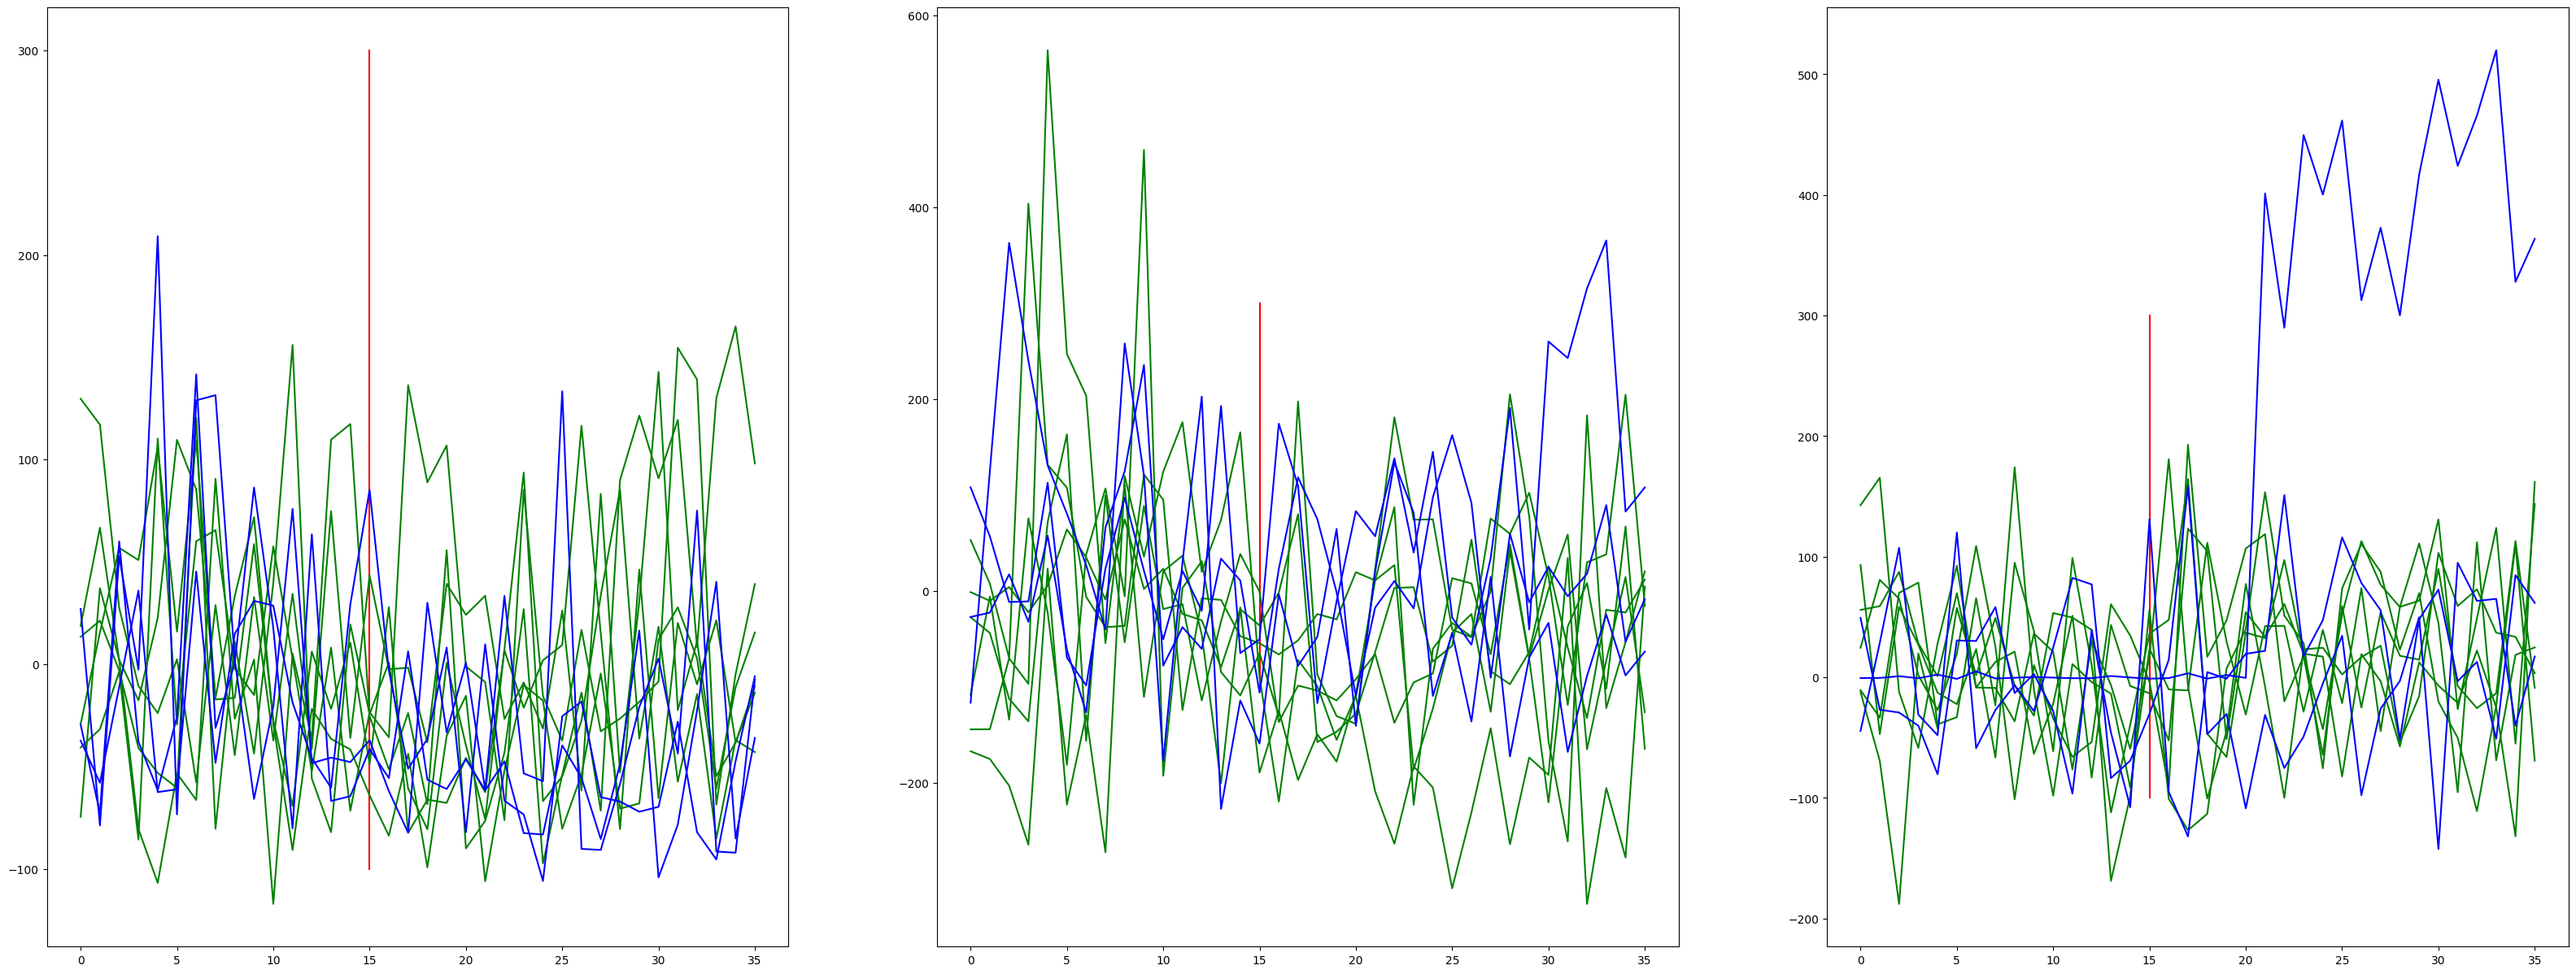

In [48]:
#print(np.ceil(len(statSingleP)/4)
preStim=range(5,16)
SingL=36
num_rows = np.ceil(len(FAll.keys()) / 3).astype(int)
#print(num_rows)
#print(len(statSingleP))
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,3,figsize=(40,15))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):
    
    #if CellI == len(statSingleP):
       # break
    #print(CellI)
    PSTH=FAll[PointCandi[CellI]]['1.12']
    CellJ=np.int16(PointCandi[CellI])
    print(CellJ)
    PSTH=PSTH[CellJ,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([15,15],[-100,300],'r')
    axSub.plot(range(0,SingL),Result,'g')

    PSTH=FAll[PointCandi[CellI]]['1.16']
    PSTH=PSTH[CellJ,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot(range(0,SingL),Result,'b')

1
7
5
1


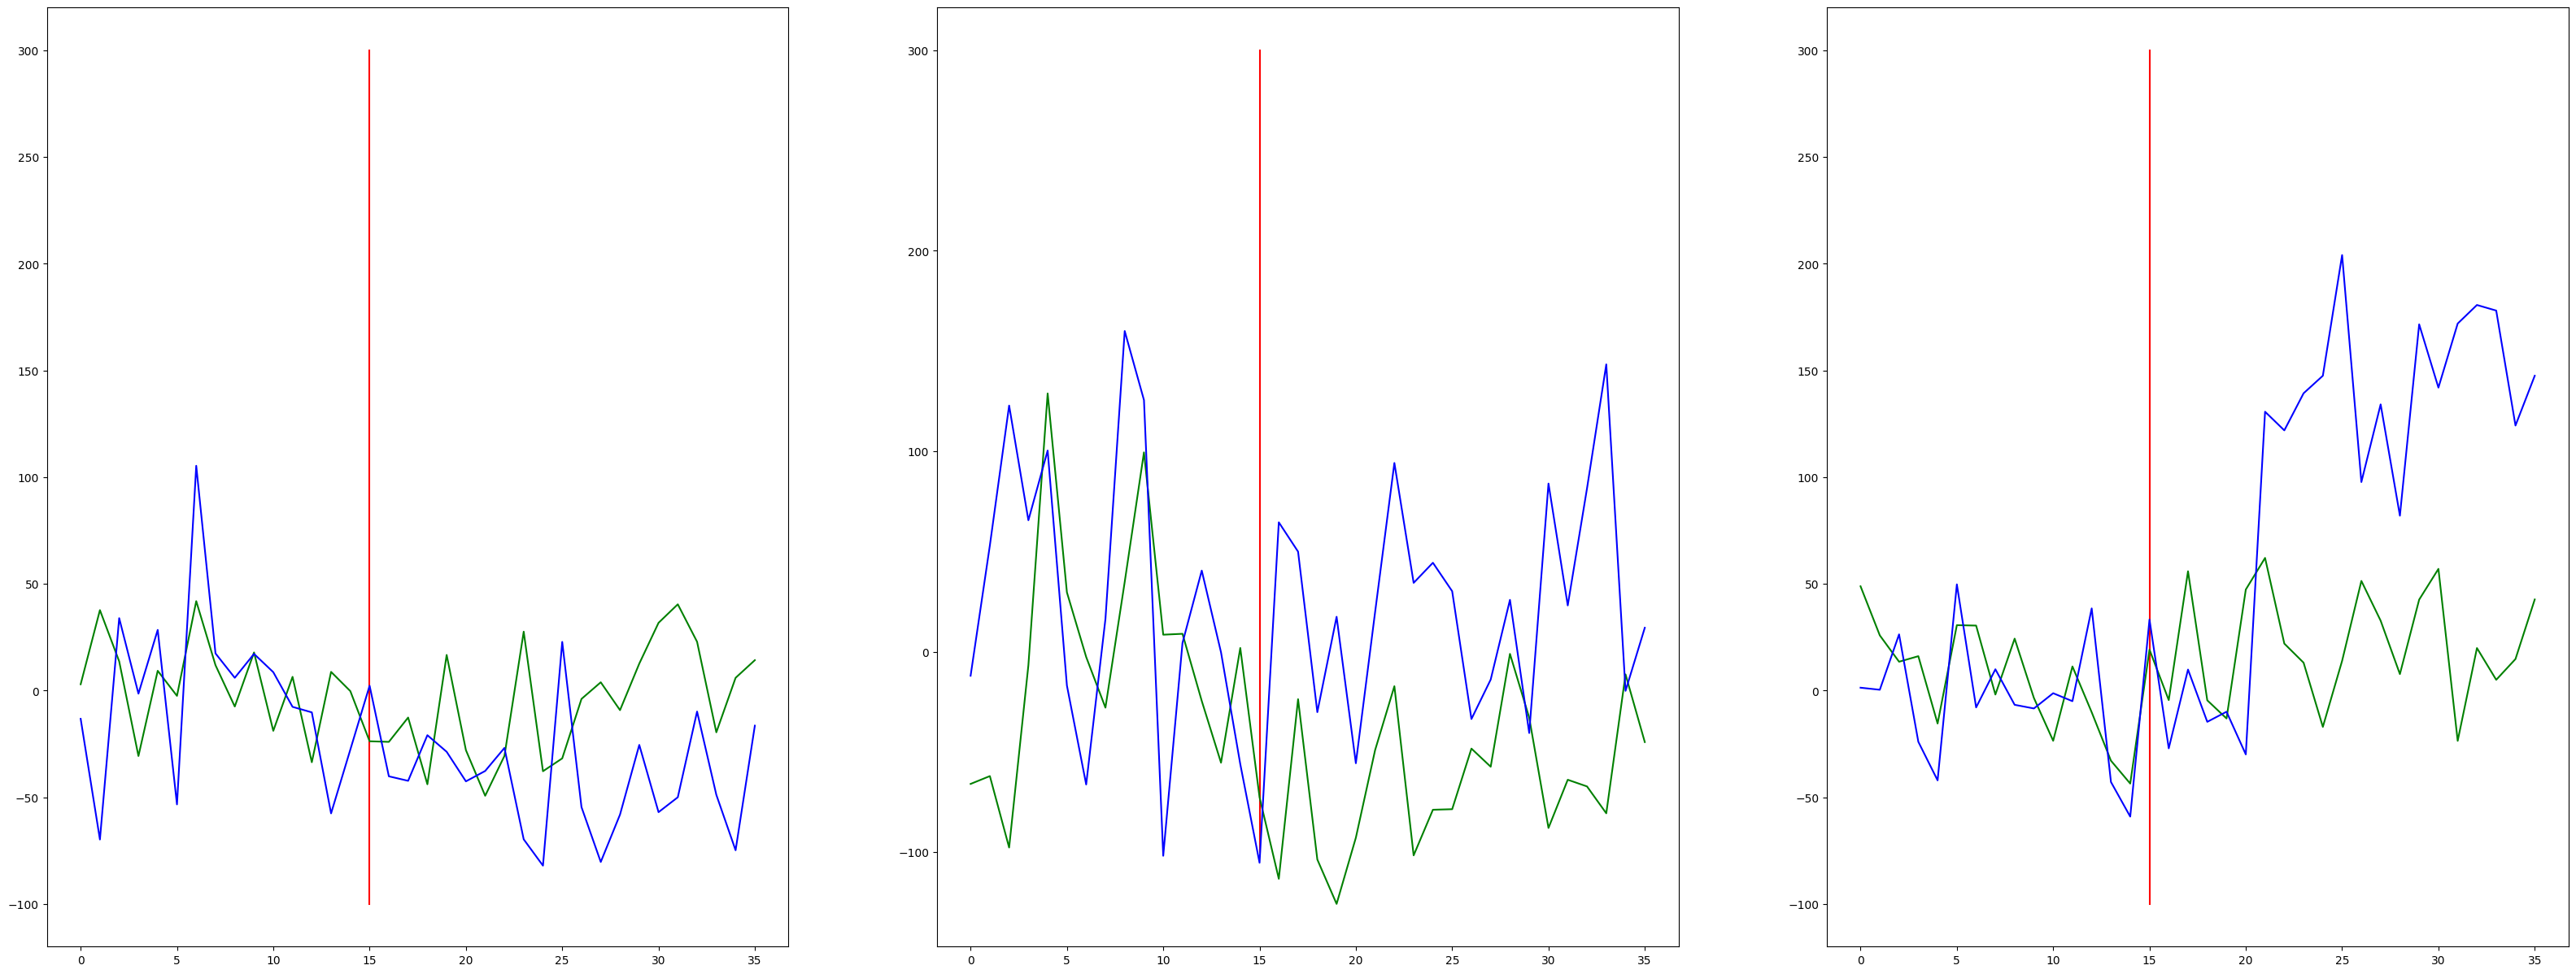

In [49]:
preStim=range(5,16)
SingL=36
num_rows = np.ceil(len(FAll.keys()) / 3).astype(int)
print(num_rows)
#print(len(statSingleP))
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,3,figsize=(40,15))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):

    PSTH=FAll[PointCandi[CellI]]['1.12']
    CellJ=np.int16(PointCandi[CellI])
    print(CellJ)
    PSTH=PSTH[CellJ,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([15,15],[-100,300],'r')
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'g')

    PSTH=FAll[PointCandi[CellI]]['1.16']
    PSTH=PSTH[CellJ,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'b')



(50, 5)
(50, 5)


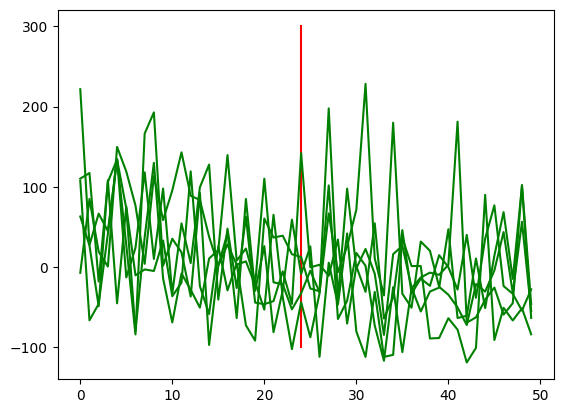

In [79]:


CellI=13;
PSTH=FAll[str(CellI)]['1.15']
PSTH=PSTH[CellI-1,:,:]
print(PSTH.shape)

preStim=range(15,25)
SingL=50

baseLine=np.mean(PSTH[preStim,:],axis=0)
baseLine=np.tile(baseLine.T,(SingL,1))
baseLine.shape
print(baseLine.shape)
Result=PSTH-baseLine
plt.plot([24,24],[-100,300],'r')
plt.plot(range(0,SingL),Result,'g')

0
1
2
3
4
5
6
7
8
9
10
11
12
13


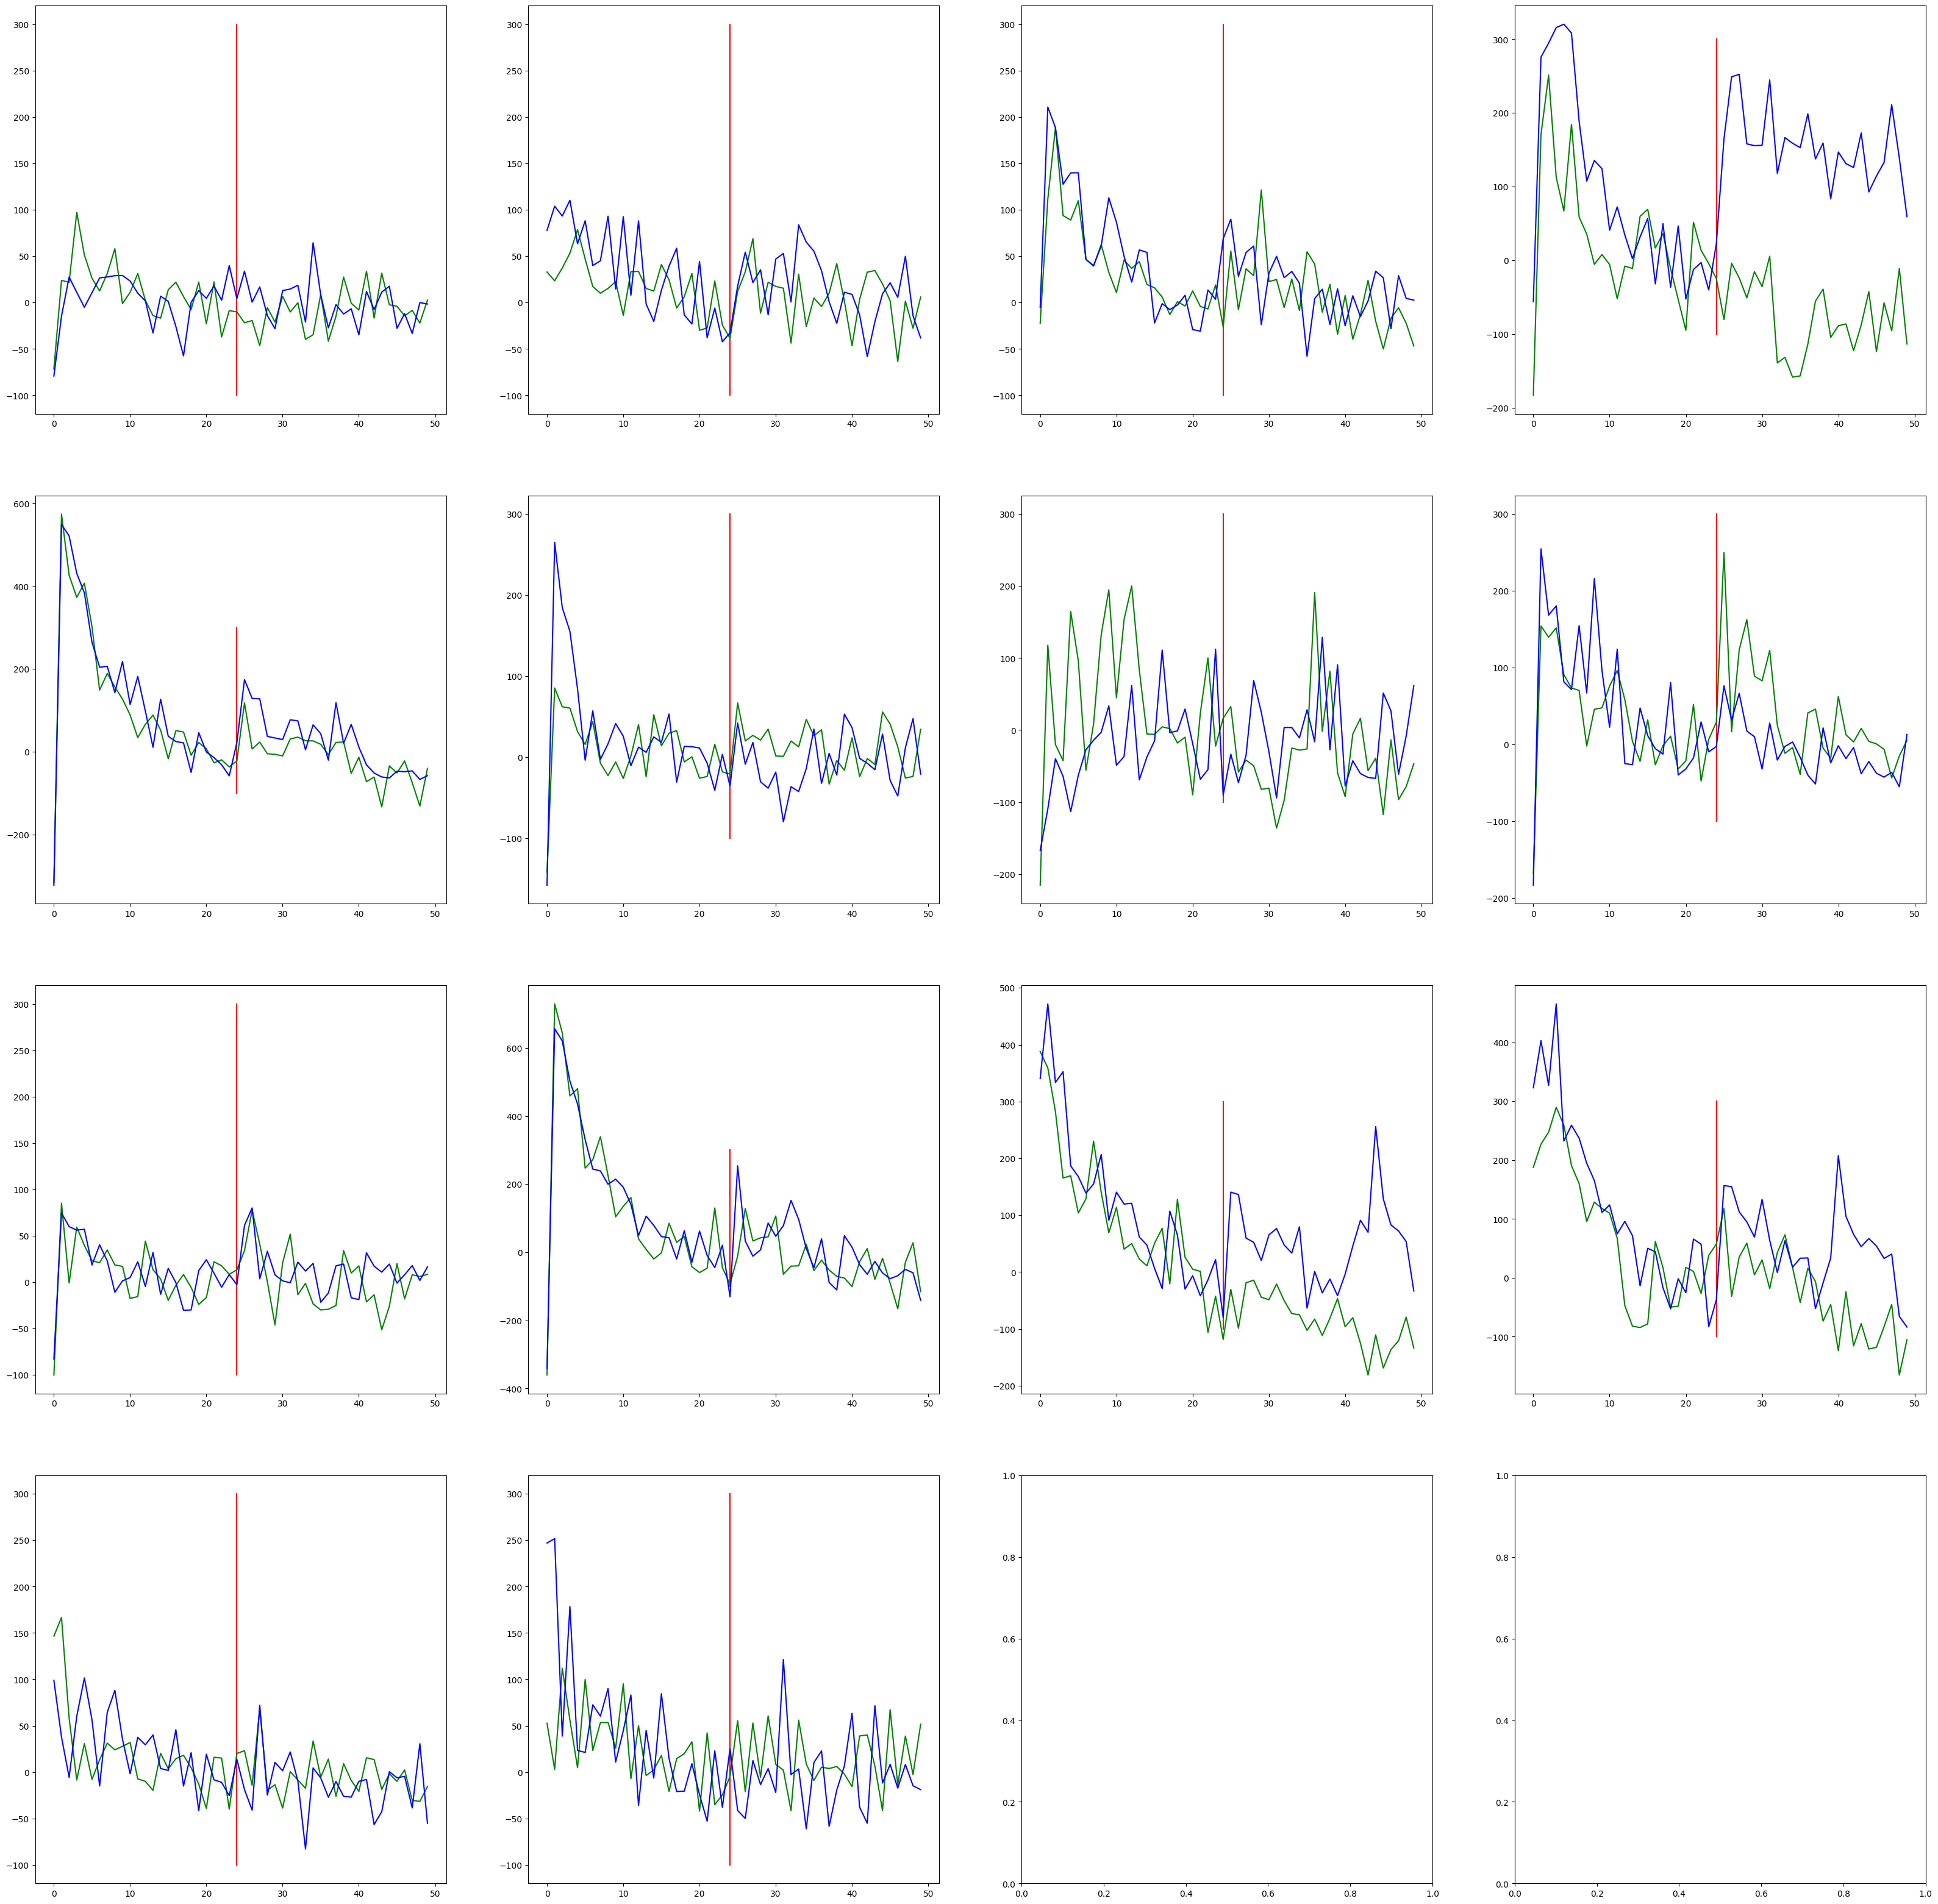

In [93]:
#print(np.ceil(len(statSingleP)/4)
preStim=range(15,25)
SingL=50
num_rows = np.ceil(len(statSingleP) / 4).astype(int)
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,4,figsize=(40,40))
#ax=ax.flatten()
for CellI,axSub in enumerate(ax.flatten()):
    
    if CellI == len(statSingleP):
        break
    print(CellI)
    PSTH=FAll[str(CellI+1)]['1.12']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot([24,24],[-100,300],'r')
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'g')

    PSTH=FAll[str(CellI+1)]['1.15']
    PSTH=PSTH[CellI,:,:]
    baseLine=np.mean(PSTH[preStim,:],axis=0)
    baseLine=np.tile(baseLine.T,(SingL,1))
    baseLine.shape
    #print(baseLine.shape)
    Result=PSTH-baseLine
    axSub.plot(range(0,SingL),np.mean(Result,axis=1),'b')

In [28]:
FAlltemp.keys()

dict_keys(['7', '5', '1'])

In [72]:
base_dir = ops0['save_path0']
Radius=10
Laser_values = [1.16]
colorCell=[None]
colorCell[0]=[0,1,0]
BaselineInd=range(10,16)
ResponseInd=range(17,19)
LineWidth=2
ResponseAll=[None]*len(PointCandi)
PointNeed=np.int16(PointCandi)-1
statSinglePNeed=statSingleP[PointNeed]
#print(statSinglePNeed)
#CellJ=np.int16(PointCandi[CellI])
#print(np.ceil(len(statSingleP)/4)
#num_rows = np.ceil(len(statSingleP) / 4).astype(int)
#fig, ax = plt.subplots(num_rows,4,figsize=(40,20))
#ax=ax.flatten()
for CellI,Cell in enumerate(statSinglePNeed):
    CellJ=np.int16(PointCandi[CellI])
    print(CellJ)
    CellXYtemp=CellXYZ[SinglePInd[CellJ],range(2)]
   # CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
    Laser = Laser_values[0]
    statCell=[None]
    statCell[0]=statSinglePNeed[CellI]
    Point=np.int16(PointCandi)
    Laser=Laser
    plane_idx=PlaneSingleP[CellI]
    #print(plane_idx)
    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    if len(matching_files)==0:
       continue
    ResponseAll[CellI]=CB.BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)


7
5
1


In [73]:
ResponseInd=range(25,28)
print(np.array(ResponseInd))
len(statSinglePNeed)
ResponseAll

[25 26 27]


[array([[[  66.31481481,  -95.46296296,  -99.18518519, ...,
           136.07407407, -158.5       ,   48.81481481],
         [ -13.59259259,  -46.51851852,  -60.14814815, ...,
            42.46296296, -120.42592593,  223.12962963],
         [  51.46296296,  -13.98148148, -154.03703704, ...,
            70.59259259,  -36.42592593,  -52.2037037 ],
         ...,
         [ -16.87037037,  -21.55555556,  101.90740741, ...,
            58.25925926,   22.03703704,  -18.38888889],
         [ -13.12962963,   24.18518519,  -19.81481481, ...,
           -22.68518519,   91.46296296,  -41.72222222],
         [ -30.22222222,  -34.11111111,   13.66666667, ...,
           219.18518519,   -6.85185185,  -60.7037037 ]],
 
        [[-165.38888889,  118.31481481,  -24.12962963, ...,
           -31.33333333, -121.12962963,  -27.22222222],
         [ 170.37037037,   21.12962963,  -64.22222222, ...,
            75.27777778,  -90.38888889, -124.31481481],
         [  93.68518519,   63.88888889,  -30.83333333, 

1
[151 203]
[340 264]
[175 276]


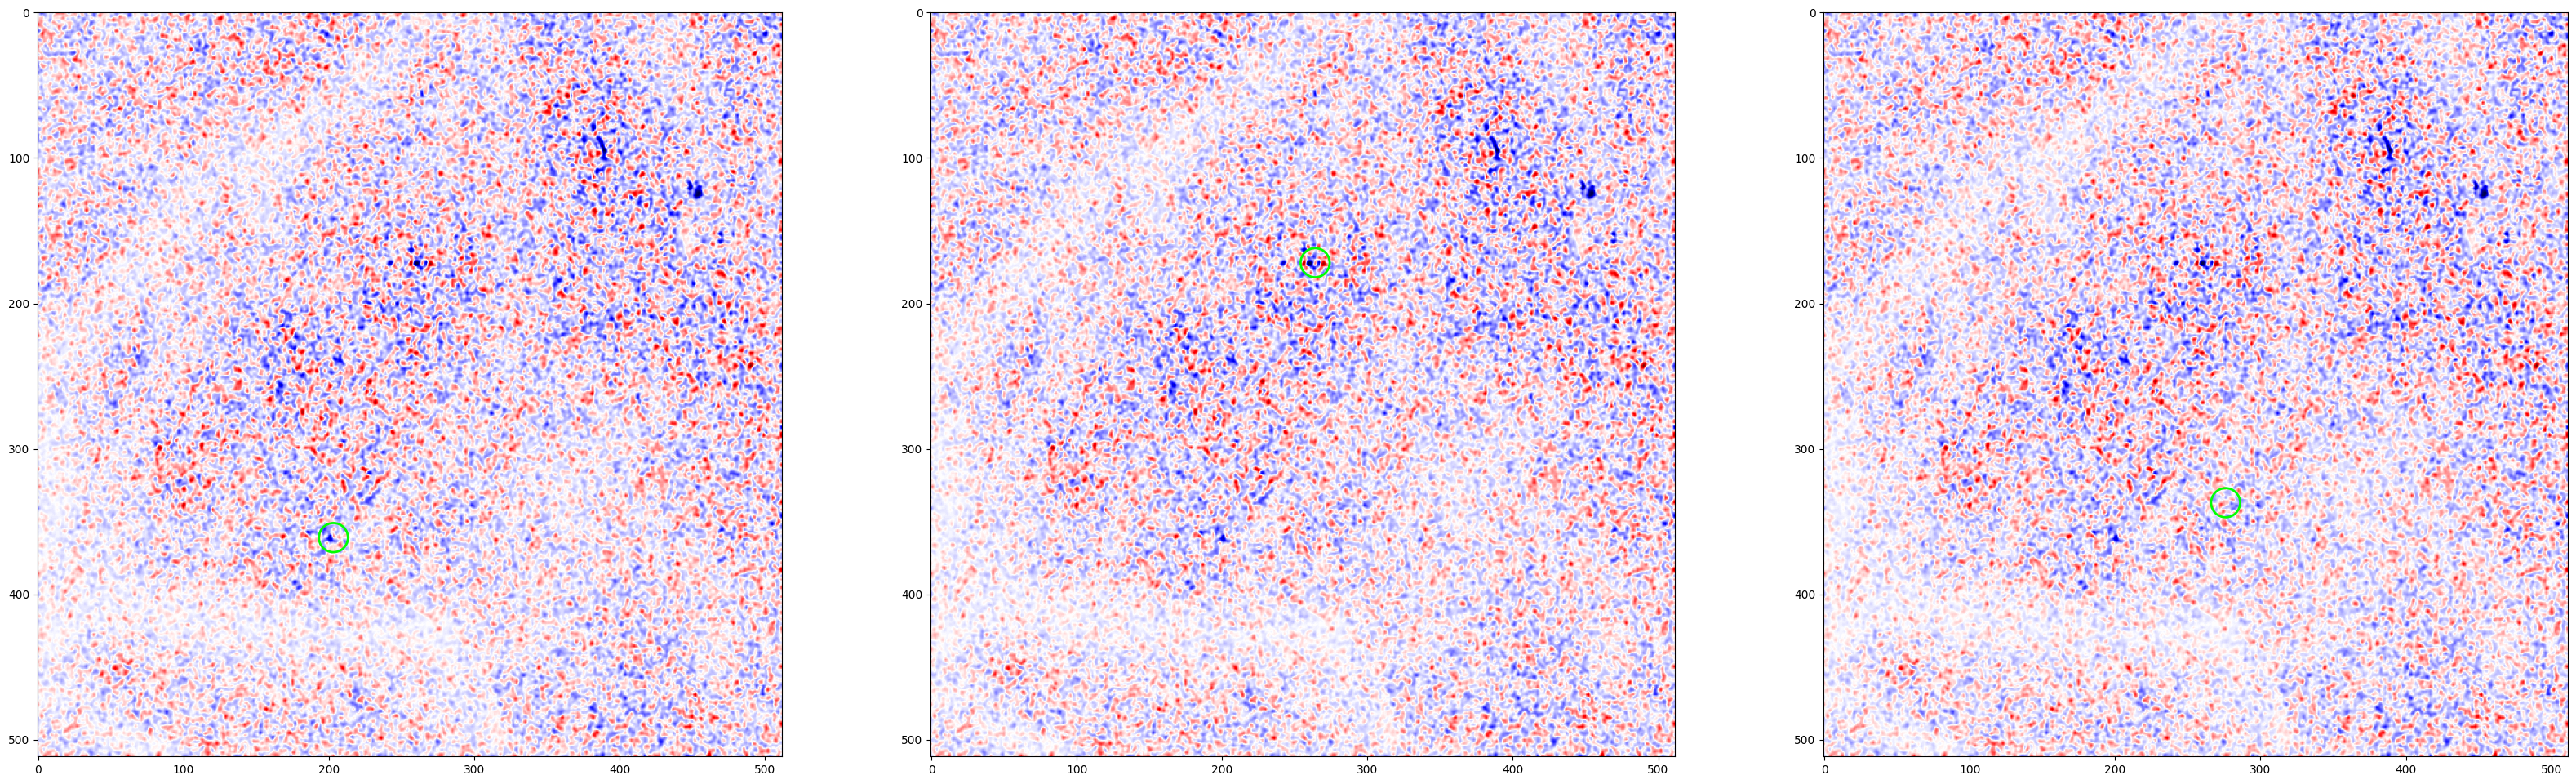

In [74]:

#ax=ax.flatten()
preStim=range(5,16)
SingL=36
num_rows = np.ceil(len(FAll.keys()) / 3).astype(int)
print(num_rows)
#print(len(statSingleP))
SmoothParam=[0.5,0.5]
fig, ax = plt.subplots(num_rows,3,figsize=(40,15))

for CellI,axSub in enumerate(ax.flatten()):
    PointCandi[CellI]
    CellJ=np.int16(PointCandi[CellI])
    Cell=statSingleP[CellJ]
    CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
    smoothed_data = ndimage.gaussian_filter(np.squeeze(ResponseAll[CellI][plane_idx,:,:]), sigma=1)
    im=axSub.imshow(smoothed_data,cmap='seismic',vmin=-200,vmax=200)
    CB.plotCellCenter(axSub, ops0['Ly'], CellXYtemp, Radius, colorCell, LineWidth)

In [1]:
print(ResponseAll[1])

NameError: name 'ResponseAll' is not defined

In [68]:
importlib.reload(CB)
FAll=[None]*len(PlaneSingleP)
DeltaFAll=[None]*len(PlaneSingleP)
SpksAll=[None]*len(PlaneSingleP)

for CellI,axSub in enumerate(ax.flatten()):
    Cell=statSingleP[CellI]
    CellXYtemp=CellXYZ[SinglePInd[CellI],range(2)]
   # CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
    Laser = Laser_values[0]
    statCell=[None]
    statCell[0]=statSingleP[CellI]
    Point=CellI+1
    Laser=Laser
    SingL=40
    plane_idx=PlaneSingleP[CellI]
    #print(plane_idx)
    matching_files = []
    file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(file_pattern)
    matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
    if len(matching_files)==0:
       continue
    #print(matching_files)
    #PSTHAll[CellI]=CB.PSTHFromBin(matching_files,statCell,plane_idx,SingL,ops0)
    FAll[CellI],DeltaFAll[CellI],SpksAll[CellI]=CB.NeuroFromBin(matching_files,statSingleP,plane_idx,SingL,ops0)

Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.38 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Masks created, 0.37 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.
Extracted fluorescence from 8 ROIs in 40 frames, 0.03 sec.

(8, 40)
(1, 40)


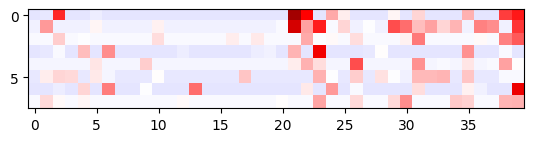

In [89]:
PSTH=SpksAll[0]
#print(PSTH.shape)
preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
#Result=np.mean(PSTH,axis=1)-baseLine
print(Result.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic',vmin=-100,vmax=100)
#plt.plot(range(0,SingL),Result.T,'g')
#plt.plot(PSTH,'g')
#print(CellActivatedID)

In [48]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)

for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,:]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statCell, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,Ind]=np.double(F)

preStim=range(0,10)
print(PSTH.shape)
baseLine=np.mean(np.mean(PSTH[preStim,:],axis=1),axis=0)
Response=np.mean(PSTH,axis=1)
print(Response.shape)
#baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
#plt.imshow(np.mean(PSTH,axis=1)-baseLine,cmap='seismic')
np.shape(Response-baseLine)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')

(173, 512, 512)
E:\LuRecording\03222024Test\TSeries-03222024-0932-014Laser1.12Point7.bin
Masks created, 0.19 sec.


c:\users\zhangl33\projects\suite2p\suite2p\extraction\extract.py:125: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  Fi[n] = np.dot(data[:, cell_ipix[n]], cell_lam[n])


Extracted fluorescence from 1 ROIs in 25 frames, 2.94 sec.
Extracted fluorescence from 1 ROIs in 25 frames, 0.01 sec.


NameError: name 'PSTH' is not defined

NameError: name 'baseMap' is not defined

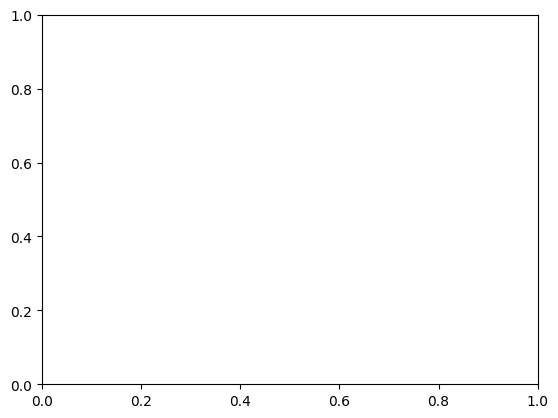

In [214]:
fig, ax = plt.subplots()
ax.imshow(baseMap[:,:,0],cmap='seismic')

F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-003Laser1.2Point2.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109 112 115 118]
2
[  2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53
  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 101 104 107
 110 113 116 119]
F:\LuSLMOnlineTest\03082024\TSeries-03082024-1105-012Laser1.3Point2.bin
(120, 512, 512)
120
0
[  0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51
  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 102 105
 108 111 114 117]
1
[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109

IndexError: list index out of range

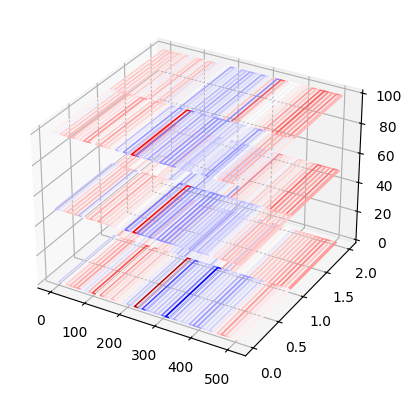

In [54]:
BaselineInd=range(2,10)

ResposeInd=range(12,25)
matching_files = []
#file_pattern = f'Laser{Laser}Point{2}.bin'
file_pattern = f'Point{2}.bin'
#print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

#print(matching_files)
ResponseMap=BinList_PSTHHeatMap(matching_files,BaselineInd,ResposeInd,ops0)


#fig, ax = plt.subplots(1,3)
#ax[0].imshow(baseMap[:,:,0],cmap='seismic')
#ax[1].imshow(ResponseMap[:,:,1],cmap='seismic')
#ax[2].imshow(ResponseMap[:,:,2],cmap='seismic')

# Example usage
ZPlot = [0,50,100]
vLim=[-1000,1000]
# Assuming you have defined ResponseMap elsewhere
#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
MultiMatrix3DPlotZ(ax,ResponseMap, ZPlot,vLim,0.1)
plt.show()
cellCenterGroup=[None]*1
cellCenterGroup[0]=CellXYZ[[1,3,5,11,9,15,19],:]
Radius=[12]
Radius=np.array(Radius)
#len(Radius)

colorCell = plt.cm.jet(np.linspace(0, 1, 8))

LineWidth=20
plotCellCenter3D(ax,cellCenterGroup[0], Radius, colorCell, LineWidth)
#plotCellCenter3DGroup(ax,cellCenterGroup, Radius)
#plt.imshow(ResponseMap[:,:,1],cmap='viridis')
#plt.cm.viridis(Data[:, :, k])

F:\LuSLMOnlineTest\03262024Test\\
1.12
1
1
[ 1  2  4  8 13 16 24 26]
13
[192 227]


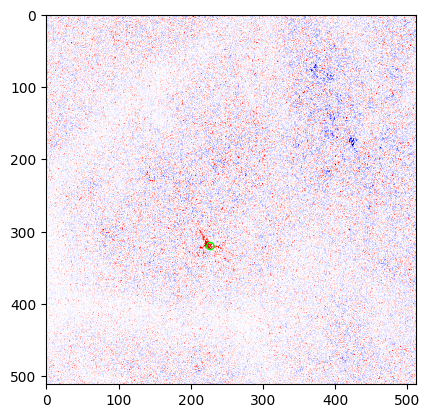

In [19]:
importlib.reload(CB)

BaselineInd=range(0,21)
ResponseInd=range(22,26)

# Define the base directory
base_dir = ops0['save_path0']
Laser_values = [1.12]
PointI_values = np.array(range(0,len(statSingleP)))+1
#print(PointI_values)

# Define the pattern to search for
file_pattern = 'Laser{}Point{}.bin'
# Define the pattern to search for
file_pattern = 'Point{}.bin'
# List to store matching file paths
matching_files = []

TrialNum=5
#PostPSTH=np.zeros((len(SinglePID),len(Laser_values),len(statSingleP),TrialNum))
print(base_dir)

CellID=4
statCell=[None]
statCell[0]=statSingleP[CellID]
Point=CellID+1
Laser=Laser_values[0]
print(Laser)
SingL=25
plane_idx=PlaneSingleP[CellID]
#CellActivatedID=UnitNeedI[CellID]
#CellActivatedID=PointI_values[CellID]


matching_files = []
file_pattern = f'Laser{Laser}Point{Point}.bin'
#print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

#print(matching_files)
ops1=ops0

#PSTH=np.zeros((SingL,TrialNum))
print(plane_idx)

ResponseMap=CB.BinList_PSTHHeatMap(matching_files,BaselineInd,ResponseInd,ops0)

fig, ax = plt.subplots()
#print(ResponseMap.shape)
print(plane_idx)
#ax[1].imshow(ResponseMap[:,:,plane_idx],cmap='seismic',vmin=-1000,vmax=1000)
ax.imshow(ResponseMap[plane_idx,:,:],cmap='seismic',vmin=-500,vmax=500)
print(SinglePInd)
print(SinglePInd[CellID])
CellXYtemp=CellXYZ[SinglePInd[CellID],range(2)]
Radius=5

colorCell=[None]
colorCell[0]=[0,1,0]
LineWidth=1
CB.plotCellCenter(ax, ops0['Ly'], CellXYtemp, Radius, colorCell, LineWidth)

In [ ]:
Radius = [12]
Radius = np.array(Radius)

colorCell = plt.cm.jet(5)

LineWidth = 3

# Assuming cellCenterGroup is defined elsewhere


plotCellCenter3D(ax, CellXYZ[[1,3,5],:], Radius, colorCell, LineWidth)

plt.show()  # Call plt.show() after all plotting is done

In [18]:
np.array(range(0,len(statSingleP),4))

array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64,
       68, 72, 76, 80, 84])

In [56]:
PointI_values

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# Iterate over X and Y values and search for matching files
#PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values),len(statSingleP),TrialNum))
print(base_dir)

CellID=1
Point=PointI_values[CellID]
Laser=Laser_values[1]
print(Laser)
SingL=30
plane_idx=PlaneSingleP[CellID]
#CellActivatedID=UnitNeedI[CellID]
CellActivatedID=PointI_values[CellID]-1

matching_files = []
file_pattern = f'Laser{Laser}Point{Point}.bin'
print(file_pattern)
#print(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))

print(matching_files)
ops1=ops0

PSTH=np.zeros((len(statSingleP),SingL,TrialNum))
for Ind,Trial in enumerate(matching_files):
    rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
    print(rawBin.shape)
    print(Trial)
    plane_data = rawBin[range(0+plane_idx,SingL*nplanes,nplanes),:,::-1]
    
    stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                          f_reg_chan2 = plane_data,ops=ops0)
    dF = F.copy() - ops1['neucoeff']*Fneu

    dF = suite2p.extraction.preprocess(
    F=dF,
    baseline=ops1['baseline'],
    win_baseline=ops1['win_baseline'],
    sig_baseline=ops1['sig_baseline'],
    fs=ops1['fs'],
    prctile_baseline=ops1['prctile_baseline']
    )
    PSTH[:,:,Ind]=np.double(dF)

preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic',vmin=-200,vmax=200)
plt.plot(0,CellActivatedID,'g*')
print(CellActivatedID)

NameError: name 'PointI_values' is not defined

In [ ]:
preStim=range(0,10)
baseLine=np.mean(np.mean(PSTH[:,preStim,:],axis=2),axis=1)
print(np.shape(baseLine.T))
baseLine=np.tile(baseLine.T,(SingL,1)).T
print(baseLine.shape)
plt.imshow(np.mean(PSTH,axis=2)-baseLine,cmap='seismic')
plt.plot(0,CellActivatedID,'r*')

In [85]:
print(Ind)
#dF.shape
PSTH[:,:,Ind]=np.double(dF)
dF.shape
PSTH.shape

0


(85, 30, 3)

In [86]:
PSTH[:,:,Ind]=np.double(dF)

In [50]:
# Iterate over X and Y values and search for matching files
PointFile=[None]*len(PointI_values)
TrialNum=3
PostPSTH=np.zeros((len(PointI_values),len(Laser_values)),len(statSingleP),TrialNum)

for Idx,Point in enumerate(PointI_values):
    PointFile[Idx]=[None]*len(Laser_values)
    for jdx,Laser in enumerate(Laser_values):
        matching_files = []
        # Construct the filename pattern
    #filename = file_pattern.format(X, Y)
    #filename = file_pattern.format(Point)
        file_pattern = f'Laser{Laser}Point{Point}.bin'
    #print(filename)
        # Search for files matching the pattern in the directory
    #print(os.path.join(base_dir, '**', filename))
    #files = glob.glob(os.path.join(base_dir, '**', filename), recursive=True)
   # print(files)
        # Add matching files to the list
    #matching_files.extend(files)
        matching_files.extend(glob.glob(os.path.join(base_dir, '*' + file_pattern)))
        PointFile[Idx][jdx]=matching_files
        print(matching_files)


NameError: name 'PointI_values' is not defined

In [25]:
PointFile[0][1]

['F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-024Laser1.4Point1.bin',
 'F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-068Laser1.4Point1.bin',
 'F:\\LuSLMOnlineTest\\02292024\\TSeries-02292024-1001-112Laser1.4Point1.bin']

In [26]:
np.shape(PointFile)

(22, 2, 3)

In [76]:
# Print the matching file paths
PreStimN=15
PostStimN=25

PreStim=range(0,15)
PostStim=range(PreStimN,PreStimN+PostStimN)
plane_idx=0


In [20]:
ops1=ops0
plane_idx=0
for Point in PointFile:
    for Laser in Point:
        for Trial in Laser:
            rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
            print(rawBin.shape)
            print(Trial)
            plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
           # nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
            stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)
            dF = F.copy() - ops1['neucoeff']*Fneu

            dF = suite2p.extraction.preprocess(
            F=dF,
            baseline=ops1['baseline'],
            win_baseline=ops1['win_baseline'],
            sig_baseline=ops1['sig_baseline'],
            fs=ops1['fs'],
            prctile_baseline=ops1['prctile_baseline']
           )

NameError: name 'PointFile' is not defined

In [49]:
#plt.imshow(dF)
np.shape(dF)
#plt.plot(dF.T)

NameError: name 'dF' is not defined

(25, 512, 512)


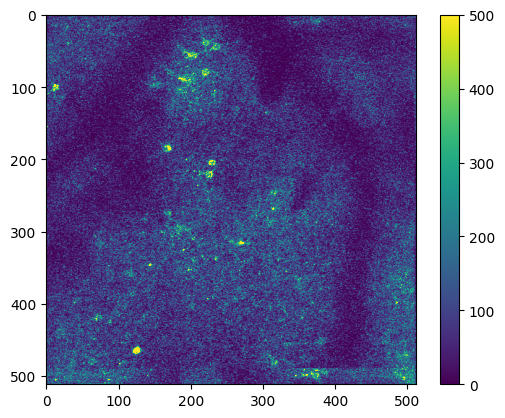

In [216]:
 plane_idx=0
 TotalFrameNeed=rawBin.shape[0]
 nplanes=3;
 plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,::-1]
   # plane_data = rawBin[range(0+plane_idx,TotalFrameNeed,nplanes),:,::-1]
    #ops, stat = suite2p.detection_wrapper(f_reg=plane_data, ops=ops1)
  #  ops['nframes']=nFrame
    #ops['meanImg']=np.mean(plane_data,axis=0)
   #meanImg=np.mean(plane_data,axis=0)
print(plane_data.shape)
plt.imshow(np.mean(plane_data,axis=0),vmin=0,vmax=500)
plt.colorbar()
#np.shape(data)
#data=np.read(rawBin)
#plt.imshow(np.mean(data,3))
#plt.imshow(np.mean(np.double(rawBin)), cmap='viridis')

In [66]:
for file_path in PointFile:
    for Trial in file_path:
        rawBin = suite2p.io.BinaryFile(Ly=ops0['Ly'],Lx=ops0['Lx'], filename=Trial)
        print(rawBin.shape)
        plane_data = rawBin[range(0+plane_idx,rawBin.shape[0],nplanes),:,:]
        nFrame = rawBin.shape[0] // nplanes
        #print(nFrame)
        #statSingleP
        stat_after_extraction, F, Fneu, F_chan2, Fneu_chan2 = suite2p.extraction_wrapper(statSingleP, f_reg=plane_data,
                                                                   f_reg_chan2 = plane_data,ops=ops0)

NameError: name 'PointFile' is not defined

In [22]:
F

NameError: name 'F' is not defined